# Readme
* The notebook illustrates acceptance diagrams at the second source for the KB-mirror-sets optical design for Pioneer.
* The last cell includes an interactive widget to play with parameters and see updated acceptance diagrams
  - Interface response could be slow when dragging the slider; try clicking the slider instead
  - Use left/right arrows for fine-tuning the parameters

# Try one settings

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def y_of_z(z, a, b):
    t = (z-b)/b
    return a*np.sqrt(1-t*t)

In [4]:
def acceptance_diagram(src_height, a, b, z_guide_start, z_guide_end):
    z1, z2 = z_guide_start, z_guide_end
    z3 = 2*b
    y1, y2 = y_of_z(np.array([z1, z2]), a, b)
    y0_max = src_height/2.
    # y of target at single reflection at z
    y_of_z_refl1 = lambda z: y0_max/z*(z3-z)
    y2 = y_of_z(z2, a, b)
    # from end of guide
    y3_max = y_of_z_refl1(z2)
    y3_ge = np.linspace(-y3_max, y3_max, 100)
    div_ge = (y3_ge-y2)/(z3-z2)
    # from start of guide
    y3_max = y_of_z_refl1(z1)
    y3_gs = np.linspace(-y3_max, y3_max, 100)
    div_gs = (y3_gs-y1)/(z3-z1)
    # from top of src
    z = np.linspace(z1, z2, 100)
    y = y_of_z(z, a,b)
    y3_mt = y_of_z_refl1(z)
    div_mt = (y3_mt-y)/(z3-z)
    # from bottom of src
    y3_mb = -y3_mt
    div_mb = (y3_mb-y)/(z3-z)
    return (y3_ge, div_ge), (y3_gs, div_gs), (y3_mt, div_mt), (y3_mb, div_mb)

In [5]:
mod_size = 0.03
# ellipse 1: from moderator to second source
b = 54/2.
#a = .25
a = 0.125
z_guide_start = 6.75
z_guide_end = 47.37
# acceptance diagram 1
mirror1_curves = acceptance_diagram(mod_size, a, b, z_guide_start, z_guide_end)

# ellipse 2: from sample to second source (backward!)
# sample_size = 0.005
sample_size = 0.004
b = (60-54)/2.
# a = 0.052
a = 0.027
z_guide_start = 60-59.
z_guide_end = 60.-56.667

# acceptance diagram 2
mirror2_curves = acceptance_diagram(sample_size, a, b, z_guide_start, z_guide_end)

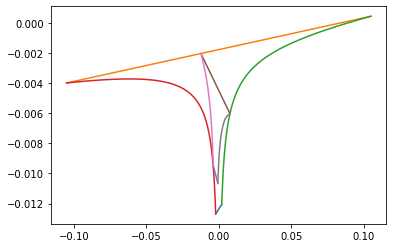

In [6]:
plt.figure()
for y, div in mirror1_curves:
    plt.plot(y, div)
for y, div in mirror2_curves:
    plt.plot(-y-0.0022, div)
# plt.xlim(-0.02, 0.02)

# Play with parameters 

In [7]:
import ipywidgets

In [8]:
def calc_diagrams(
    mod_size,
    ell1_guide_start, ell1_guide_end, ell1_a, ell1_b,
    ell2_guide_start, ell2_guide_end, ell2_a, ell2_b,
    sample_size,
):
    # b = 54/2.
    b = ell1_b
    a = ell1_a
    z_guide_start = ell1_guide_start
    z_guide_end = ell1_guide_end
    mirror1_curves = acceptance_diagram(mod_size, a, b, z_guide_start, z_guide_end)

    # b = (60-54)/2
    b = ell2_b
    a = ell2_a
    z_guide_start = ell2_guide_start
    z_guide_end = ell2_guide_end
    mirror2_curves = acceptance_diagram(sample_size, a, b, z_guide_start, z_guide_end)
    return mirror1_curves, mirror2_curves

In [9]:
from collections import OrderedDict

In [10]:
def update(
    mod_size = 30.,
    ell1_start=6750, ell1_end=47370, ell1_a=100, ell1_b = 54./2*1000,
    ell2_start=1000., ell2_end=3333, ell2_a=22,
    ell2_offset=2.3,
    sample_size=3.6,
):
    ell2_b = (60. - ell1_b*2/1000)/2*1000
    fig, ax = plt.subplots(figsize=(6,3))
    ax.set_xlim([-0.03, 0.03])
    # ax.set_ylim([-0.025, 0.005])
    mirror1_curves, mirror2_curves = calc_diagrams(
        mod_size/1000.,
        ell1_start/1000., ell1_end/1000., ell1_a/1000., ell1_b/1000.,
        ell2_start/1000., ell2_end/1000., ell2_a/1000., ell2_b/1000.,
        sample_size/1000.,
    )
    for y, div in mirror1_curves:
        ax.plot(y, div, 'k')
    for y, div in mirror2_curves:
        ax.plot(-y-ell2_offset/1000., div, 'r')
    d = OrderedDict(
        mod_size=mod_size,
        ell1_start=ell1_start, ell1_end=ell1_end, ell1_a=ell1_a, ell1_b=ell1_b,
        ell2_start=ell2_start, ell2_end=ell2_end, ell2_a=ell2_a, ell2_b=ell2_b,
        ell2_offset=ell2_offset,
        sample_size=sample_size,
    )
    print(', '.join('{}={!r}'.format(k,v) for k, v in d.items()))
    return

In [11]:
interactive_plot = ipywidgets.interactive(
    update,
    mod_size=(10, 100, 0.5),
    ell1_start=(1000., 27000., 10.), ell1_end=(27000.,53000., 10), ell1_a=(10, 500, 1.), ell1_b=(25000, 28000., 10),
    ell2_start=(500, 2900, 10.), ell2_end=(3000, 5000, 10), ell2_a=(5, 250, 1.),
    ell2_offset=(0, 10, 0.1),
    sample_size = (2, 20, 0.1),
)
output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=30.0, description='mod_size', min=10.0, step=0.5), FloatSlider(value=6…